In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#set PassengerId as the index
train.set_index('PassengerId', drop = True, inplace = True)

In [5]:
#set PassengerId as the index
#samething to the test dataframe
test.set_index('PassengerId', drop = True, inplace = True)

In [6]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.describe(include = 'all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Bailey, Mr. Percy Andrew",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
#fill the NaN values in Age with the average age.
train["Age"].fillna(train['Age'].mean(), inplace = True)
#change Age column from float to int.
train["Age"] = train["Age"].astype(int)

In [9]:
#samething with test
#fill the NaN values in Age with the average age.
test["Age"].fillna(test['Age'].mean(), inplace = True)
#change Age column from float to int.
test["Age"] = test["Age"].astype(int)

From the dataframe above we can see that Age is missing some values. We will need to fill in the NaN values with the mean.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 80.1+ KB


In [11]:
age_bins = [-1, 3, 13, 18, 29, 45, 65, np.inf]
age_labels = ['Toddlers', 'Kids', 'Teenagers', 'Young-Adults', 'Adults', 'Middle-Aged', 'Seniors']
train['Sorted-Age'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels)
train['Sorted-Age'].value_counts()

Young-Adults    422
Adults          229
Middle-Aged      93
Teenagers        68
Kids             41
Toddlers         30
Seniors           8
Name: Sorted-Age, dtype: int64

In [12]:
age_bins = [-1, 3, 13, 18, 29, 45, 65, np.inf]
age_labels = ['Toddlers', 'Kids', 'Teenagers', 'Young-Adults', 'Adults', 'Middle-Aged', 'Seniors']
test['Sorted-Age'] = pd.cut(test['Age'], bins=age_bins, labels=age_labels)

In [13]:
#drop the age column since we already have the sorted-age column
train.drop('Age',axis =1, inplace = True)

In [14]:
#drop the age column since we already have the sorted-age column
test.drop('Age',axis =1, inplace = True)

In [15]:
#given an old column that has been binned change it into a new column with its code values.
def change_to_code(oldcolumn, dataframe = train):
    newcolumn = oldcolumn + '-C'
    dataframe[oldcolumn] = dataframe[oldcolumn].astype('category', axis = 1, inplace = True)
    dataframe[newcolumn] = dataframe[oldcolumn].cat.codes
    dataframe.drop(oldcolumn,inplace=True,axis=1)
    print('{} dropped, {} added'.format(oldcolumn,newcolumn))
    

In [16]:
change_to_code('Sorted-Age')

Sorted-Age dropped, Sorted-Age-C added


In [17]:
change_to_code('Sorted-Age',test)

Sorted-Age dropped, Sorted-Age-C added



<p style="text-align: center;">Chart showing age, category, and code</p>

                                                  Note: Age category is arbitrary

Age-Code|Age-Category|Ages
--------|----------|---
0|Toddler|0-3
1|Kids|3-13
2|Teenagers|13-18
3|Young-Adults|18-29
4|Adults|29-45
5|Middle-Aged|45-65
6|Seniors|65+



#drop 'sorted-age' column as we created an 'age-code' column
train.drop('Sorted-Age',axis =1, inplace = True)

In [18]:
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sorted-Age-C
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,3
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,4
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,3
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,4
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,4


In [19]:
train.describe(include = 'all')

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sorted-Age-C
count,891.000000,891.000000,891,891,891.000000,891.000000,891,891.000000,204,889,891.000000
unique,NaN,NaN,891,2,NaN,NaN,681,NaN,147,3,NaN
top,NaN,NaN,"Bailey, Mr. Percy Andrew",male,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN
freq,NaN,NaN,1,577,NaN,NaN,7,NaN,4,644,NaN
mean,0.383838,2.308642,NaN,NaN,0.523008,0.381594,NaN,32.204208,NaN,NaN,3.223345
std,0.486592,0.836071,NaN,NaN,1.102743,0.806057,NaN,49.693429,NaN,NaN,1.127070
min,0.000000,1.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN,7.910400,NaN,NaN,3.000000
50%,0.000000,3.000000,NaN,NaN,0.000000,0.000000,NaN,14.454200,NaN,NaN,3.000000
75%,1.000000,3.000000,NaN,NaN,1.000000,0.000000,NaN,31.000000,NaN,NaN,4.000000


From the dataframe above, we can see that cabin has only 204 unique values, meaning that the rest is NaN. We will need to remove the 'Cabin' column. We will also remove the 'Embarked' column as we do not need this information to determine surival. We will also be dropping the ticket number because there is not information to dechiper the ticket numbers.

In [20]:
train.drop(['Cabin','Embarked','Ticket'], axis = 1, inplace = True)

In [21]:
#do the same to the test dataframe
test.drop(['Cabin','Embarked','Ticket'], axis = 1, inplace = True)

In [22]:
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Sorted-Age-C
PassengerId,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,3
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,4
3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,3
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,4
5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,4


Just like the age column, we will change the sex column, male & female into numerical values 1,0 respectively.

#first change the Sex column from an object to a category
train['Sex'] = train['Sex'].astype('category')

train['Sex-Code'] = train['Sex'].cat.codes

In [23]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
#change 'sex' to a category and then give it a code, drop the sex column
change_to_code('Sex')

Sex dropped, Sex-C added


In [25]:
#samething to test so that we get the same dataframe at the end
change_to_code('Sex',test)

Sex dropped, Sex-C added


train.drop('Sex',inplace = True, axis =1)


<p style="text-align: center;">Chart showing sex, and the respective code #</p>

Code|Sex
---|----
0|Female
1|Male

In [26]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}%".format(y_value *100)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


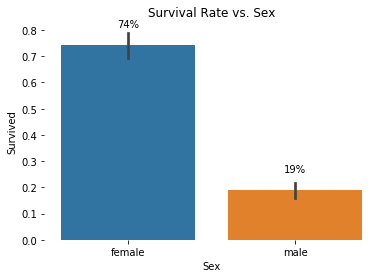

In [27]:
ax = sns.barplot(x= 'Sex-C', y ='Survived',data = train)
ax.set_title('Survival Rate vs. Sex')
ax.set_xlabel('Sex')
add_value_labels(ax,spacing = 16)
ax.set_xticks([0,1])
ax.set_xticklabels(['female','male'])
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
plt.show()

The bar graph shows the survival rate between males and females. Females had 74% chance of survival, males had just 19%

In [28]:
train.head()

,Survived,Pclass,Name,SibSp,Parch,Fare,Sorted-Age-C,Sex-C
PassengerId,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,0,7.2500,3,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,71.2833,4,0
3,1,3,"Heikkinen, Miss. Laina",0,0,7.9250,3,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,53.1000,4,0
5,0,3,"Allen, Mr. William Henry",0,0,8.0500,4,1


Like the previous age columns we will need to bin the values in the fare column

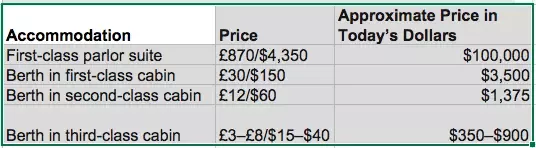


<p style="text-align: center;">
Shows the prices of the tickets in the Titanic compared to modern times</p>

In [29]:
#the bins were created according to the price of the tickets and its accommodation
fare_bins = [-1,12,30,np.inf]
fare_labels = ['Cheap','Average','Expensive']
train['Sorted-Fare'] = pd.cut(train['Fare'], bins=fare_bins, labels=fare_labels)
train['Sorted-Fare'].value_counts()
#drop Fare as we dont need its original value
train.drop('Fare',axis =1 ,inplace =True)
change_to_code('Sorted-Fare')

Sorted-Fare dropped, Sorted-Fare-C added


In [30]:
#do samething to the test column
test['Sorted-Fare'] = pd.cut(test['Fare'], bins=fare_bins, labels=fare_labels)
test['Sorted-Fare'].value_counts()
#drop Fare as we dont need its original value
test.drop('Fare',axis =1 ,inplace =True)
change_to_code('Sorted-Fare',test)

Sorted-Fare dropped, Sorted-Fare-C added


<p style="text-align: center;">
The fare was binned into three different sections according to the orignal prices in the Titanic
    
                                Note: Fare category "cheap,average,expensive" is arbitray


Code|Fare-Category|Fare
----|-----------|----
0|Cheap|0-12
1|Average|12-30
2|Expensive|30 +

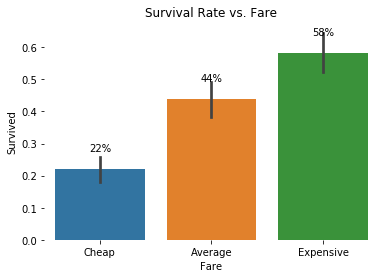

In [31]:
ax1 = sns.barplot(x= train['Sorted-Fare-C'], y ='Survived',data = train)
ax1.set_title('Survival Rate vs. Fare')
ax1.set_xlabel('Fare')
add_value_labels(ax1,spacing = 16)
ax1.set_xticks(list(range(len(train['Sorted-Fare-C'].unique()))))
ax1.set_xticklabels(labels= fare_labels)
for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)
plt.show()

The bar graph shows that those who bought cheap tickets had the lowest rate of survival, and those who bought the expensive tickets had the greatest rate of survival. 22% of cheap-ticket holders survived while 58% of expensive-ticket holders survived. Those with average-tickets had a 44% rate of survival.

In [32]:
train.head()

,Survived,Pclass,Name,SibSp,Parch,Sorted-Age-C,Sex-C,Sorted-Fare-C
PassengerId,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,0,3,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,4,0,2
3,1,3,"Heikkinen, Miss. Laina",0,0,3,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,4,0,2
5,0,3,"Allen, Mr. William Henry",0,0,4,1,0


In [33]:
#notice how every name is followed by a mr,mrs,miss, etc..
#Get just the titles for every name
got = train.Name.str.split(',').str[1]
train.loc[:,'Name']=pd.DataFrame(got).Name.str.split('\s+').str[1]

In [34]:
got = test.Name.str.split(',').str[1]
test.loc[:,'Name']=pd.DataFrame(got).Name.str.split('\s+').str[1]

In [35]:
train.head()

,Survived,Pclass,Name,SibSp,Parch,Sorted-Age-C,Sex-C,Sorted-Fare-C
PassengerId,,,,,,,,
1,0,3,Mr.,1,0,3,1,0
2,1,1,Mrs.,1,0,4,0,2
3,1,3,Miss.,0,0,3,0,0
4,1,1,Mrs.,1,0,4,0,2
5,0,3,Mr.,0,0,4,1,0


In [36]:
#create a variable that has the groups of titles organized by the mean of surival
grouped_title = train.groupby(by = 'Name').mean()
grouped_title.head()

,Survived,Pclass,SibSp,Parch,Sorted-Age-C,Sex-C,Sorted-Fare-C
Name,,,,,,,
Capt.,0.000000,1.000000,1.000000,1.0,6.000000,1.000000,2.000000
Col.,0.500000,1.000000,0.000000,0.0,5.000000,1.000000,1.500000
Don.,0.000000,1.000000,0.000000,0.0,4.000000,1.000000,1.000000
Dr.,0.428571,1.285714,0.571429,0.0,4.142857,0.857143,1.428571
Jonkheer.,0.000000,1.000000,0.000000,0.0,4.000000,1.000000,0.000000


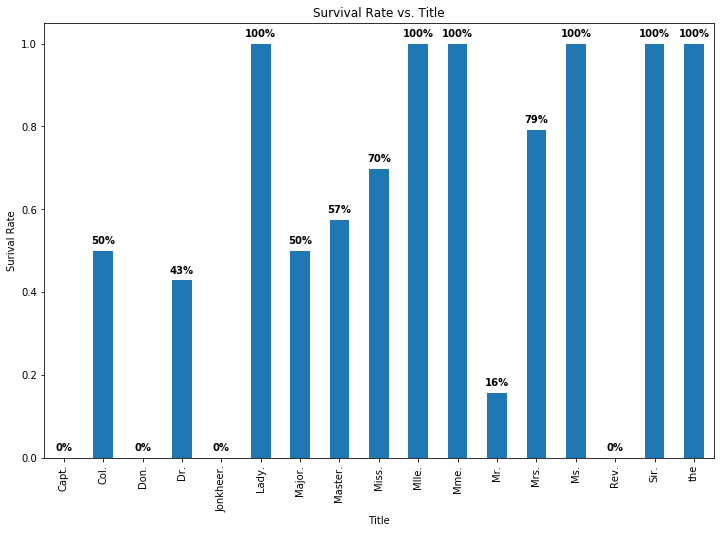

In [37]:
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = grouped_title['Survived'].plot(kind='bar')
ax.set_title('Survival Rate vs. Title')
ax.set_xlabel('Title')
ax.set_ylabel('Surival Rate')
ax.set_xticklabels(grouped_title.index)

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}%".format(y_value *100)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,  # Vertically align label differently for
                                        # positive and negative values.
        fontweight="bold")                 #font = bold

# Call the function above. All the magic happens there.
add_value_labels(ax)



            The bar graph titled 'Survival Rate vs. Title' shows the rate of surival for each title

In [38]:
#find the number of people with each title
title_series = train['Name'].value_counts()

In [39]:
#find the number of people with each title
train.Name.value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Mlle.          2
Ms.            1
Mme.           1
Don.           1
Jonkheer.      1
Sir.           1
Capt.          1
Lady.          1
the            1
Name: Name, dtype: int64

In [40]:
change_to_code('Name')

Name dropped, Name-C added


In [41]:
change_to_code('Name',test)

Name dropped, Name-C added


In [42]:
train['Name-C'].value_counts()

11    517
8     182
12    125
7      40
3       7
14      6
1       2
9       2
6       2
4       1
2       1
16      1
5       1
15      1
10      1
13      1
0       1
Name: Name-C, dtype: int64

In [43]:
train.head()

,Survived,Pclass,SibSp,Parch,Sorted-Age-C,Sex-C,Sorted-Fare-C,Name-C
PassengerId,,,,,,,,
1,0,3,1,0,3,1,0,11
2,1,1,1,0,4,0,2,12
3,1,3,0,0,3,0,0,8
4,1,1,1,0,4,0,2,12
5,0,3,0,0,4,1,0,11


In [44]:
train.drop('Name-C',axis =1, inplace = True)

In [45]:
#drop it in the test column also
test.drop('Name-C',axis =1, inplace = True)

Drop the Tile-C /Name column as the column has too many categories and most categories has only 1 value.  
We wont be using the Title/Names column for our predictor.

In [46]:
#rename the column names
new_c_names= {'Parch':'ParCh','Sorted-Age-C': 'Age', 'Sex-C': 'Sex', 'Sorted-Fare-C': 'Fare', 'Name-C': 'Title'}
train.rename(columns = new_c_names, inplace = True )

In [47]:
#rename the column names
new_c_names= {'Parch':'ParCh','Sorted-Age-C': 'Age', 'Sex-C': 'Sex', 'Sorted-Fare-C': 'Fare', 'Name-C': 'Title'}
test.rename(columns = new_c_names, inplace = True )

In [48]:
train.head()

,Survived,Pclass,SibSp,ParCh,Age,Sex,Fare
PassengerId,,,,,,,
1,0,3,1,0,3,1,0
2,1,1,1,0,4,0,2
3,1,3,0,0,3,0,0
4,1,1,1,0,4,0,2
5,0,3,0,0,4,1,0


In [49]:
train.Fare.value_counts().sum()

891

In [50]:
train.describe()

,Survived,Pclass,SibSp,ParCh,Age,Sex,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,3.223345,0.647587,0.842873
std,0.486592,0.836071,1.102743,0.806057,1.127070,0.477990,0.811437
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,3.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,4.000000,1.000000,2.000000
max,1.000000,3.000000,8.000000,6.000000,6.000000,1.000000,2.000000


In [51]:
#change pclass to code
change_to_code('Pclass')

Pclass dropped, Pclass-C added


In [52]:
#change pclass to code
change_to_code('Pclass',test)

Pclass dropped, Pclass-C added


                           In order to keep the consistency of the minimum values in the dataframe = 0, 
                               Pclass was converted so that 0=1, 1=2, 2=3

Code|PClass|
----|-----|
0|1
1|2
2|3


                                Now the min value for every column is set to 0

In [53]:
#rename Pclass-c to Class
train.rename(columns = {'Pclass-C':'Class'}, inplace = True)

In [54]:
#rename Pclass-c to Class
test.rename(columns = {'Pclass-C':'Class'}, inplace = True)

In [55]:
train.head()

,Survived,SibSp,ParCh,Age,Sex,Fare,Class
PassengerId,,,,,,,
1,0,1,0,3,1,0,2
2,1,1,0,4,0,2,0
3,1,0,0,3,0,0,2
4,1,1,0,4,0,2,0
5,0,0,0,4,1,0,2


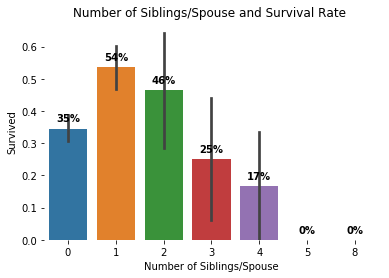

In [56]:
#plot survival rate of sibs/sp
ax = sns.barplot(x='SibSp',y = 'Survived', data = train)
ax.set_xlabel('Number of Siblings/Spouse')
ax.set_ylabel('Survived')
ax.set_title('Number of Siblings/Spouse and Survival Rate ')
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
add_value_labels(ax)

The bar graph shows the number of siblings/spouse and the survival rate

In [57]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

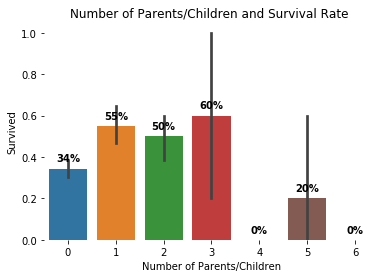

In [58]:
#plot survival rate of par/ch
ax = sns.barplot(x='ParCh',y = 'Survived', data = train)
ax.set_xlabel('Number of Parents/Children')
ax.set_ylabel('Survived')
ax.set_title('Number of Parents/Children and Survival Rate ')
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
add_value_labels(ax)

The bar graph shows the number of Parents/Children and Survival Rate

In [59]:
train['ParCh'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: ParCh, dtype: int64

In [60]:
train.describe()

,Survived,SibSp,ParCh,Age,Sex,Fare,Class
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.523008,0.381594,3.223345,0.647587,0.842873,1.308642
std,0.486592,1.102743,0.806057,1.127070,0.477990,0.811437,0.836071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,2.000000
75%,1.000000,1.000000,0.000000,4.000000,1.000000,2.000000,2.000000
max,1.000000,8.000000,6.000000,6.000000,1.000000,2.000000,2.000000


In [61]:
#import train_test_split
from sklearn.model_selection import train_test_split
#nsplit for what variables we are going to use to predict and the target value
predictors = train.drop(['Survived'], axis=1)
target = train["Survived"]
# We split the X into train and test to find the best k
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.22, random_state = 4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (694, 6) (694,)
Test set: (197, 6) (197,)


In [62]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gaussian)

78.17


In [63]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

81.73


C:\Users\jshyo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_svc)

83.76


C:\Users\jshyo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [65]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_linear_svc)

81.73


C:\Users\jshyo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [66]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
acc_perceptron = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_perceptron)

69.54


C:\Users\jshyo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [67]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_decisiontree)

81.73


In [68]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

82.23


C:\Users\jshyo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [70]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_knn)

82.23


In [71]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier



sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_sgd)

71.07


C:\Users\jshyo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [72]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

82.23


Create a dataframe to the model with its respective accuracy score

In [73]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,83.76
1,KNN,82.23
3,Random Forest,82.23
9,Gradient Boosting Classifier,82.23
2,Logistic Regression,81.73
6,Linear SVC,81.73
7,Decision Tree,81.73
4,Naive Bayes,78.17
8,Stochastic Gradient Descent,71.07
5,Perceptron,69.54


The Support Vector Machine Model was used in order to predict the survival rates in the test data set because it had the highest accuracy score, as shown above.

In [74]:
predict = svc.predict(test)

In [75]:
passengerid = list(test.index)

In [76]:
survival = list(predict)

In [77]:
new_df = pd.DataFrame({'PassengerID': passengerid, 'Survived': survival})

In [78]:
test.head()

,SibSp,ParCh,Age,Sex,Fare,Class
PassengerId,,,,,,
892,0,0,4,1,0,2
893,1,0,5,0,0,2
894,0,0,5,1,0,1
895,0,0,3,1,0,2
896,1,1,3,0,1,2


In [79]:
new_df.head()

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [81]:
new_df.set_index('PassengerID',inplace = True)

In [84]:
id_w_test = pd.concat([test,new_df],axis = 1, sort = False)

In [85]:
id_w_test.head(10)

,SibSp,ParCh,Age,Sex,Fare,Class,Survived
892,0,0,4,1,0,2,0
893,1,0,5,0,0,2,0
894,0,0,5,1,0,1,0
895,0,0,3,1,0,2,0
896,1,1,3,0,1,2,1
897,0,0,2,1,0,2,0
898,0,0,4,0,0,2,1
899,1,1,3,1,1,1,0
900,0,0,2,0,0,2,1
901,2,0,3,1,1,2,0


References  
https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner/data  
https://www.youtube.com/watch?v=3eTSVGY_fIE

In [86]:
def dead_or_alive():
    sbsp = input("# of Siblings/Spouse: ")
    parch= input("# of Parents/Children: ")
    age = input("Toddler[0], Kid[1],Teenager[2], Young-Adult[3], Adult[4], MiddleAge[5], Senior[6]: ")
    sex = input("Female[0] or Male[1]: ")
    fare = input("Fare: Cheap[0], Average[1], Expensive[2]: ")
    clss = input("Class 1st[0], 2nd[1], 3rd[2]: ")
    b =[]
    if sbsp == sbsp:
        b.append(sbsp)
    if parch == parch:
        b.append(parch)
    if age == age:
        b.append(age)
    if sex == sex:
        b.append(sex)
    if fare == fare:
        b.append(fare)
    if clss == clss:
        b.append(clss)
    data = b
    predictors = pd.DataFrame(data)
    predictors = predictors.transpose()
    if svc.predict(predictors) == 0:
        print('You would have had a {}% chance of death!'.format(acc_svc))
    else:
        print('You would have had a {}% chance of survival!'.format(acc_svc))

In [87]:
dead_or_alive()

# of Siblings/Spouse: 1
# of Parents/Children: 1
Toddler[0], Kid[1],Teenager[2], Young-Adult[3], Adult[4], MiddleAge[5], Senior[6]: 3
Female[0] or Male[1]: 1
Fare: Cheap[0], Average[1], Expensive[2]: 1
Class 1st[0], 2nd[1], 3rd[2]: 2
You would have had a 83.76% chance of death!
